Assignment 1 Part - 3.1 using KMeans From Scratch

In [1]:
#Download All Necessary Python Package required for K Means Clustering
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.cm as cm

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#Load MNIST data from tensorflow datasets
(x, _), (_, _) = mnist.load_data()

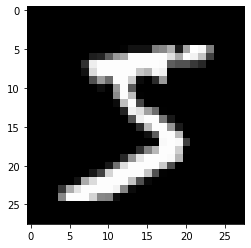

In [3]:
#Visualize One Image only
plt.imshow(x[0,:,:],cmap=plt.cm.gray)

In [4]:
# Print shape of dataset
print("Training: ",x.shape)
# Print type of Data
print("Type of Data:", type(x))

Training:  (60000, 28, 28)
Type of Data: <class 'numpy.ndarray'>


In [5]:
# Reshape the dataset from (60000, 28, 28) to (60000, 746)
x=x.reshape(60000,28*28)
print(x.shape)

(60000, 784)


In [6]:
#Normalize Image Pixel value by dividing 255. So variance would be between 0.0 to 1.0
x = x.astype(np.float32) / 255.

In [7]:
#Checking Maximum Vale
print(np.amax(x[0,:]))

1.0


In [8]:
# Took only 30000 images out of 60000 as my laptop is not able to run on 60000, taking infinite time and heating
z = x[0:30000,:]

In [11]:
# KMean Clustering Code From Scratch

import numpy as np
import matplotlib.pyplot as plt
''''Initialize the Class of KMeans Clustering with number of clusters, 
    cluster center initialization and maximum iterations for optimization'''
class KMeans: 
    def __init__(self, n_clusters=5,init = "random", max_iter=100, plot_steps=False):
        self.n_clusters = n_clusters # number of clusters
        self.max_iter = max_iter # maximum iteration for optimization
        self.plot_steps = plot_steps # Plot 
        self.init = init # cluster centre initialization
        # Create Empty List of Clusters
        self.clusters = [[] for _ in range(self.n_clusters)]
        # Create Emplty List of Centroids
        self.centroids = []
            
    
    def fit(self, x):
        self.x = x
        #Get Number of samples and Number of Features in Input Data
        self.n_samples, self.n_features = x.shape
        
        if (self.init == "random"): #Initialize centroids randomly
            random_idx = np.random.choice(self.n_samples, self.n_clusters, replace=False)
            self.centroids = [self.x[idx] for idx in random_idx]
        else:
            self.centroids = self.init #Initialize with given centroids
        
        #optimization for given iteration or till convergance whichever is earlier
        for _ in range(self.max_iter):
            # update clusters after creation of new clusters during optimization
            self.clusters = self._create_clusters(self.centroids)
            if(self.plot_steps):
                self.plot()
            # update centroids after creation of new clusters during optimization
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            self.cluster_centers_ = self.centroids
            if(self.plot_steps):
                self.plot()
            # check convergence after checking previous centroids and new ones are same or not
            if self._is_converged(centroids_old, self.centroids):
                break
            
        #At the end convergence, calculate/ predict the labels and J_clust/Inertia as output
        self.labels_ = self._get_cluster_labels(self.clusters)
        self.inertia_ = self._get_inertia_J_clust(self.clusters, self.centroids)
        
    # Predict with labels  
    def predict(self, x):
        self.fit(x)
        return self.labels_
    
    #Calculate centroids id or labels for each datapoint of Input Data Vector x
    def _get_cluster_labels(self, clusters):
        #Create Empty Labels of size of Total Number of Input Data
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster: 
                labels[sample_idx] = cluster_idx
        return labels
    
    # Creation of clusters after making bunches of nearest neighbours 
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.n_clusters)]
        # Associate each sample in x with clusters
        for idx , sample in enumerate(self.x):
            centroids_idx = self._closest_centroid(sample, centroids)
            clusters[centroids_idx].append(idx)
        return clusters
    
    #Find Nearest Centroids / Cluster Center using using euclidean_distance
    def _closest_centroid(self, sample, centroids):
        distances = [self.euclidean_distance(sample, point) for point in centroids]     
        closest_idx = np.argmin(distances)
        return closest_idx
    
    #After creation of clusters, calculate the Cluster center/ Centroids using mean of cluster
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.n_clusters, self.n_features))
        for clusters_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.x[cluster], axis=0)
            centroids[clusters_idx] = cluster_mean
        return centroids
    
    # Check convergence after match previous and new centroids 
    def _is_converged(self, centroids_old, centroids):
        distances = [self.euclidean_distance(centroids_old[i],centroids[i]) for i in range(self.n_clusters)]
        return sum(distances)==0
    
    #Calculate euclidean_distance between two data vector
    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    # Calculate J_clust or inertia of total clusters
    def _get_inertia_J_clust(self, clusters, centroids):
        sum_distances = [np.sum((self.x[clusters[i]]-centroids[i])**2) for i in range(self.n_clusters)]
        return (np.sum(sum_distances))/self.n_samples
        
    #Plotting of Scatter of data point of Input Data Vector with centroid, 
    #only applicable for Two dimesional Feature
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        
        for i , index in enumerate(self.clusters):
            point = self.x[index].T
            ax.scatter(*point)
            
        for point in self.centroids:
            ax.scatter(*point, marker='x',color='black',linewidth=2)
        plt.show()
        

In [13]:
# Now implement K means clustering on MNIST Datasets for range of cluster from 2 to 30
k_max = 20 # Maximum value of Clusters
k_init = 2 # Minimum Value of Clusters

inertia_list = [] # List of J_clust for each number of clusters 
centroids_list = [] # List of K Nos. Centroids for each number of clusters
clusters_labels_list = [] 
y_predict_list = [] # List of group assignment indices for each number of clusters

for i in range(k_init, k_max): # iterate over range of clusters and save results in lists
    # Initialize the Random Clusters from MNIST Datasets
    random_indices = np.random.randint(low=0, high=z.shape[0], size=i, dtype=int)
    clusters_init = z[random_indices]
    
    #Pass the Parameters in Kmeans Clustering
    kmeans = KMeans(n_clusters=i,init=clusters_init ,max_iter=100)
    kmeans.fit(z) # Run the K-means clustering on Mnist Dataset
    
    y_predict_list.append(kmeans.labels_) # Predcitions of Labels
    # Calculte the J_Cluster / Composite Squared Distance between data points and centroids for all data vectors
    inertia = kmeans.inertia_ 
    inertia_list.append(inertia) # Appned the J_Clust of this clusters in List
    # Calculate and save Clusters Centroid in list
    centroids = kmeans.cluster_centers_
    centroids_list.append(centroids) 

    print("Number of Cluster :",i)
    print("J_clust / Inertia :",inertia)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Number of Cluster : 2
J_clust / Inertia : 49.56271220556302
Number of Cluster : 3
J_clust / Inertia : 47.09580955561578
Number of Cluster : 4
J_clust / Inertia : 45.33681012201919
Number of Cluster : 5
J_clust / Inertia : 43.57996494299672
Number of Cluster : 6
J_clust / Inertia : 42.36632782066298
Number of Cluster : 7
J_clust / Inertia : 41.50582225516873
Number of Cluster : 8
J_clust / Inertia : 40.73995135768735
Number of Cluster : 9
J_clust / Inertia : 40.12948880224944
Number of Cluster : 10
J_clust / Inertia : 39.38331786785697
Number of Cluster : 11
J_clust / Inertia : 38.84545095577977
Number of Cluster : 12
J_clust / Inertia : 38.71608625014845
Number of Cluster : 13
J_clust / Inertia : 37.96237298080031
Number of Cluster : 14
J_clust / Inertia : 37.445387348894116
Number of Cluster : 15
J_clust / Inertia : 36.88754000941515
Number of Cluster : 16
J_clust / Inertia : 36.507052234213106
Number of Cluster : 17
J_clust / Inertia : 36.164642188623176
Number of Cluster : 18
J_clus

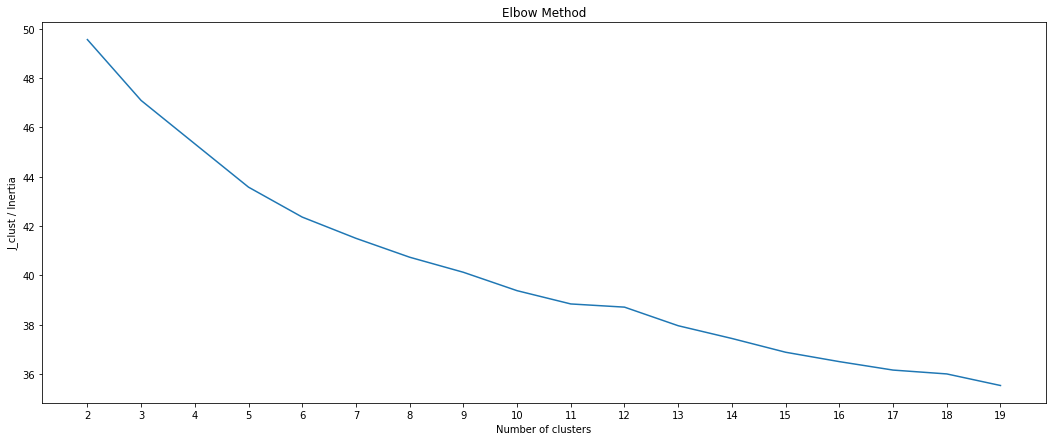

In [14]:
# Now plot the J_Clust / Inertia which a composite squared distance between datapoints and centroids
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(range(k_init, k_max), inertia_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('J_clust / Inertia')
xaxis=np.arange(k_init, k_max, 1, dtype=int)
ax1.set_xticks(xaxis)
plt.show()

In [15]:
#Group_Assignment_Indices for Optimum Clusters
print("Group_Assignment_Indices for Clusters K = 10:")
print("Length of Predictions :", len(y_predict_list[10]))
print(y_predict_list[10][0:100])

Group_Assignment_Indices for Clusters K = 10:
Length of Predictions : 30000
[ 7.  5.  3. 11.  8.  6. 11.  7. 11.  8.  7. 11. 10.  0. 11.  8.  6.  2.
  0.  8.  3.  5.  8. 11.  0.  9.  3.  7. 10. 11. 10.  2.  0.  8.  5. 11.
  0.  5.  3.  0. 11.  2. 11.  8.  3.  8.  2.  2. 10.  7.  7.  1.  3. 11.
  8.  2.  1.  8.  3. 11.  6. 11.  0.  5.  4. 11.  0. 11.  1.  5. 11.  8.
 11.  0.  7.  5.  9. 11. 11.  8. 10.  5.  6.  0.  8.  2. 10.  8.  1.  8.
  4.  8.  3.  0.  2.  5.  8.  2.  7. 11.]


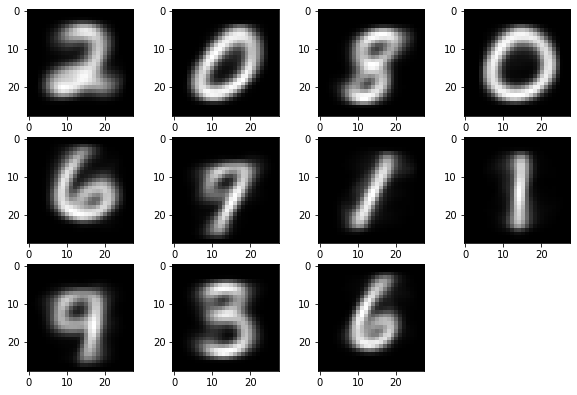

In [17]:
# Dislay the all images of Centroids when K is 10:
centroids = centroids_list[11-k_init]
centroids = centroids.reshape(centroids.shape[0],28,28)
centroids = centroids * 255
plt.figure(figsize = (10,9))
#bottom = 0.35
for i in range(centroids.shape[0]):
# plt.subplots_adjust(bottom)
 plt.subplot(4,4,i+1)
 #plt.title("Number:{}".format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i],cmap=plt.cm.gray)